**Homework 1:** *Data-Driven Modeling for Engineers* (ME 2063) - Instructor: H. Babaee,  **Due: 4:00 pm, January 19, 2023.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Watch [this](https://www.youtube.com/watch?v=wB9C0Mz9gSo) Matplotlib tutorial before solving Problems 1 and 2. You can also use MATLAB for this Homework.

# Problem 1
Compute the x, y and z coordinates such that $y = \sin(x)$, $z = \cos(x)$ and $x \in [0,2\pi]$. Plot the y and z curves using Matplotlib with title, legend, grid, and axes labels.

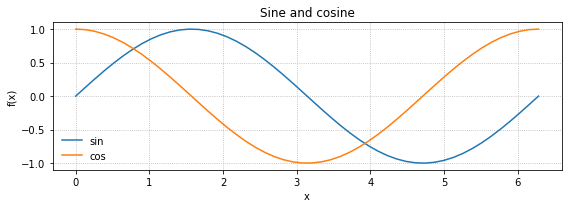

In [8]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
z = np.cos(x)

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x, y, label='sin')
ax.plot(x, z, label='cos')
ax.set_title('Sine and cosine')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.legend(frameon=False)
ax.grid(linestyle=':')
fig.tight_layout()

# Problem 2
A regression model is  given by: $f(x;\boldsymbol{\theta}) = \theta_1 x + \theta_2 x^2$. Assuming that  $\{x_n,y_n\}, n=1,2, \dots N$ is the training  data:


1. Find an analytical expression for the optimum $\theta_1$ and $\theta_2$ by minimizing the loss function given by: 
    \begin{equation}
       E(\theta_1,\theta_2) = \frac{1}{2} \sum_{n=1}^N (\theta_1 x_n + \theta_2 x_n^2 - y_n)^2
    \end{equation}
   To this end, you should use the optimality conditions   $\partial E/\partial \theta_1=0$
   and $\partial E/\partial \theta_2=0$ and find a linear system of equations for $\theta_1$ and $\theta_2$. Show all the details. 
2.  Assume the training data is given in the table below and use the expression in Part 1 and calculate the optimum $\theta_1$ and $\theta_2$. 

| $x_n$ | 0.8147 | 0.9058 | 0.1270 | 0.9134 | 0.6324 | 0.0975 | 0.2785 | 0.5469 | 0.9575 | 0.9649 | 
| :---: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: |
| $y_n$ | 0.2269 | 0.9533 | -0.1331 | 0.6697 | 0.0064 | -0.1870 | -0.3367 | -0.0476 | 0.9763 | 1.0050 |

> Please use hand calculation for computing $\theta_1$ and $\theta_2$. Plot the resulting regressed model and the training data on the same figure for the interval of $x \in [0,1]$.

3. The optimum vector $\boldsymbol{\theta} = (\theta_1, \theta_2)^T $ can also be obtained from the generic expression of $A \boldsymbol{\theta}=\Phi^T \mathbf{y}$, where $A=\Phi^T \Phi$,  $\Phi =[ \phi_1(\mathbf{x}), \phi_2(\mathbf{x})] $,  $\mathbf{x}$ and $\mathbf{y}$ are  $N \times 1$ represent the vectors that contain the training data,  $\Phi$ is a matrix of size $N \times 2$ and $\phi_1(x) = x$ and $\phi_2(x)=x^2$. Write a program in Python to compute $\theta_1$ and $\theta_2$ and compare the results with those obtained in Part 2.



Answer 1.

We can derive analytical expressions for the optimal values of $\theta_1$ and $\theta_2$ by setting the derivative of the error function to zero:

\begin{align}
    0 &= \frac{\partial}{\partial \theta} E(\theta) \\
    0 &= \frac{\partial}{\partial \theta} \frac{1}{2} \sum_n (\theta_1 x_n + \theta_2 x_n^2 - y_n)^2 \\
    0 &= \frac{1}{2} \sum_n \frac{\partial}{\partial \theta} (\theta_1 x_n + \theta_2 x_n^2 - y_n)^2 \\
    0 &= \frac{1}{2} \sum_n 2 (\theta_1 x_n + \theta_2 x_n^2 - y_n) \frac{\partial}{\partial \theta} (\theta_1 x_n + \theta_2 x_n^2 - y_n) \\
    0 &= \sum_n (\theta_1 x_n + \theta_2 x_n^2 - y_n) \frac{\partial}{\partial \theta} (\theta_1 x_n + \theta_2 x_n^2 - y_n) \\
\end{align}

From here, we can derive one equation using the $\theta_1$ partial derivative:

\begin{align}
    0 &= \sum_n (\theta_1 x_n + \theta_2 x_n^2 - y_n) \frac{\partial}{\partial \theta_1} (\theta_1 x_n + \theta_2 x_n^2 - y_n) \\
    0 &= \sum_n (\theta_1 x_n + \theta_2 x_n^2 - y_n) x_n \\
    0 &= \sum_n \theta_1 x_n^2 + \theta_2 x_n^3 - y_n x_n \\
\end{align}

And a second equation from the $\theta_2$ partial derivative:

\begin{align}
    0 &= \sum_n (\theta_1 x_n + \theta_2 x_n^2 - y_n) \frac{\partial}{\partial \theta_2} (\theta_1 x_n + \theta_2 x_n^2 - y_n) \\
    0 &= \sum_n (\theta_1 x_n + \theta_2 x_n^2 - y_n) x_n^2 \\
    0 &= \sum_n \theta_1 x_n^3 + \theta_2 x_n^4 - y_n x_n^2 \\
\end{align}

We can rearrange and combine these into a system of linear equations:

\begin{align}
    \sum_n x_n^2 \theta_1 + \sum_n x_n^3 \theta_2  &= \sum_n y_n x_n \\
    \sum_n x_n^3 \theta_1 + \sum_n x_n^4 \theta_2 &= \sum_n y_n x_n^2 \\
\end{align}

Answer 2.

Given the provided training data, we can compute the coefficients and righthand side of the linear equations as follows:
    
\begin{align}
    \sum_n x_n^2 &= 4.9685 \\
    \sum_n x_n^3 &= 4.2632 \\
    \sum_n x_n^4 &= 3.7729 \\
    \sum_n y x_n &= 3.4136 \\
    \sum_n y x_n^2 &= 3.2805 \\
\end{align}

Thus we have a numerical linear system with two equations and two unknowns:

\begin{align}
    4.9685 \theta_1 + 4.2632 \theta_2 &= 3.4136 \\
    4.2632 \theta_1 + 3.7729 \theta_2 &= 3.2805 \\
\end{align}

We can simplify the system by dividing each row by its first coefficient:

\begin{align}
    \theta_1 + 0.8580 \theta_2 &= 0.6870 \\
    \theta_1 + 0.8849 \theta_2 &= 0.7694 \\
\end{align}

Then we subtract row 1 from row 2 and solve for $\theta_2$:

\begin{align}
    (0.8849 - 0.8580) \theta_2 &= (0.7694 - 0.6870) \\
    0.0269 \theta_2 &= 0.0823 \\
    \theta_2 &= 3.0594
\end{align}

Finally, we can substitute $\theta_2$ back into row 1 and solve for $\theta_1$:

\begin{align}
    \theta_1 + 0.8580 (3.0594) &= 0.6870 \\
    \theta_1 + 2.6249 &= 0.6870 \\
    \theta_1 &= -1.9378
\end{align}

We can check the regression solution by plotting the model with the training data:

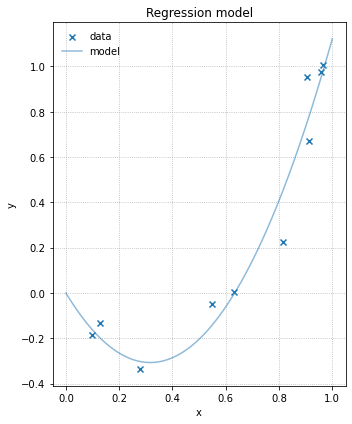

In [14]:
# create the data set
x = np.array([
    0.8147, 0.9058, 0.1270, 0.9134, 0.6324, 0.0975, 0.2785, 0.5469, 0.9575, 0.9649
])
y = np.array([
    0.2269, 0.9533, -0.1331, 0.6697, 0.0064, -0.1870, -0.3367, -0.0476, 0.9763, 1.0050
])

# manually derived model parameters
theta = np.array([-1.9378, 3.0594])

# evaluate the model
x_plot = np.linspace(0, 1, 1000)
phi_plot = np.stack([x_plot, x_plot**2], axis=-1)
y_plot = phi_plot @ theta

# plot the data and the model
fig, ax = plt.subplots(figsize=(5, 6))
ax.scatter(x, y, label='data', marker='x')
ax.plot(x_plot, y_plot, label='model', alpha=0.5)
ax.set_title('Regression model')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(frameon=False)
ax.grid(linestyle=':')
fig.tight_layout()

Answer 3.

We can also derive the model parameters by solving the linear system with numpy. We see that the parameters we derived are similar to those generated by numpy, up to some rounding error.

In [15]:
# evaluate basis functions
phi = np.stack([x, x**2], axis=-1)

# set up the linear system
A = phi.T @ phi
b = phi.T @ y

# solve the linear system
theta = np.linalg.solve(A, b)

print(theta)

[-1.93828663  3.05969317]


# Problem 3
For a generic model with $K$ basis functions of $\Phi =[\phi_1(\mathbf{x}), \phi_2(\mathbf{x}), \dots, \phi_K(\mathbf{x})]$ and the training data given by vectors $\mathbf{x}$ and $\mathbf{y}$, the loss function can be expressed by: \begin{equation}
     E(\boldsymbol{\theta}) =  \frac{1}{2} \bigg \|\Phi \boldsymbol{\theta} - \mathbf{y}\bigg \|^2 = \frac{1}{2} \big(\Phi \boldsymbol{\theta} - \mathbf{y} \big)^T \big(\Phi \boldsymbol{\theta} - \mathbf{y}\big) 
 \end{equation}
 where $\boldsymbol{\theta}$ is a vector of $K\times 1$  containing the regression parameters. In the above expression, the loss function $E(\boldsymbol{\theta})$ is a scalar and its derivative with respect to $\boldsymbol{\theta}$ is a vector of size $K\times 1$, i.e., 
 \begin{equation}
     \frac{\partial{E}}{\partial{\boldsymbol{
       \theta}}}= \begin{pmatrix} \frac{\partial{E}}{\partial{\theta_1}} \\
     \frac{\partial{E}}{\partial{\theta_2}} \\
     . \\
     . \\
     . \\
     \frac{\partial{E}}{\partial{\theta_K}}
     \end{pmatrix}.
 \end{equation}
 Use the linear algebra identities presented in Lecture 2 and show that the optimality condition given by $\dfrac{\partial E}{\partial \boldsymbol{\theta}}=\mathbf{0}$ results in: $A \boldsymbol{\theta}=\Phi^T \mathbf{y}$, where $A=\Phi^T \Phi$.

Answer:

We can derive the equation for the optimal model parameters that minimized the error function above in matrix notation as follows:

\begin{align}
    0 &= \frac{\partial}{\partial \theta} E(\theta) \\
    0 &= \frac{\partial}{\partial \theta} \frac{1}{2} \| \Phi \theta - y \|^2 \\
    0 &= \frac{\partial}{\partial \theta} \frac{1}{2} (\Phi \theta - y)^\top(\Phi \theta - y) \\
    0 &= \frac{1}{2} \frac{\partial}{\partial \theta} \left( (\Phi \theta - y)^\top(\Phi \theta - y) \right) \\
    0 &= \frac{1}{2} \left( \frac{\partial}{\partial \theta} (\Phi \theta - y)^\top (\Phi \theta - y) + (\Phi \theta - y)^\top \frac{\partial}{\partial \theta} (\Phi \theta - y) \right) \\
    0 &= \frac{1}{2} \left( \Phi^\top (\Phi \theta - y) + (\Phi \theta - y)^\top \Phi \right) \\
    0 &= \frac{1}{2} \left( \Phi^\top (\Phi \theta - y) + \Phi^\top (\Phi \theta - y) \right) \\
    0 &= \frac{1}{2} \left( 2\Phi^\top (\Phi \theta - y) \right) \\
    0 &= \Phi^\top (\Phi \theta - y) \\
    0 &= \Phi^\top \Phi \theta - \Phi^\top y \\
    \Phi^\top \Phi \theta &= \Phi^\top y
\end{align}